In [3]:
import torch.nn as nn
import torch


In [4]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
from torchvision.datasets import MNIST
from torchvision import transforms
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,),std=(0.5,))
])

data_loader= torch.utils.data.DataLoader(MNIST(('/kaggle/working/'),
                                        train=True,
                                        download=True,
                                        transform=transform),
                                        batch_size=128,
                                        shuffle=True,drop_last=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /kaggle/working/MNIST/raw/train-images-idx3-ubyte.gz to /kaggle/working/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /kaggle/working/MNIST/raw/train-labels-idx1-ubyte.gz to /kaggle/working/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /kaggle/working/MNIST/raw/t10k-images-idx3-ubyte.gz to /kaggle/working/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /kaggle/working/MNIST/raw/t10k-labels-idx1-ubyte.gz to /kaggle/working/MNIST/raw



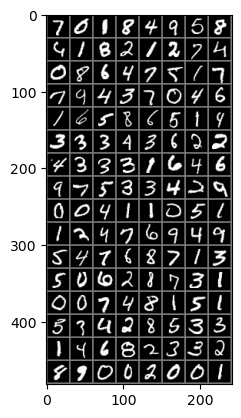

In [12]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
img,label=next(iter(data_loader))

def show(img):
    img=img/2+0.5
    img=img.numpy()
    plt.imshow(np.transpose(img,(1,2,0)))
    plt.show()
show(torchvision.utils.make_grid(img))

In [13]:

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential( 
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x): return self.model(x)
     

!pip install torch_summary
from torchsummary import summary
discriminator = Discriminator().to(device)
summary(discriminator,torch.zeros(1,784))
     

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1]                   --
|    └─Linear: 2-1                       [-1, 1024]                803,840
|    └─LeakyReLU: 2-2                    [-1, 1024]                --
|    └─Dropout: 2-3                      [-1, 1024]                --
|    └─Linear: 2-4                       [-1, 512]                 524,800
|    └─LeakyReLU: 2-5                    [-1, 512]                 --
|    └─Dropout: 2-6                      [-1, 512]                 --
|    └─Linear: 2-7                       [-1, 256]                 131,328
|    └─LeakyReLU: 2-8                    [-1, 256]                 --
|    └─Dropout: 2-9                      [-1, 256]                 --
|    └─Linear: 2-10                      [-1, 1]                   257
|    └─Sigmoid: 2-11                     [-1, 1]                   --
Total params: 1,460,225
Trainable params: 1,460,225
Non-trainable par

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1]                   --
|    └─Linear: 2-1                       [-1, 1024]                803,840
|    └─LeakyReLU: 2-2                    [-1, 1024]                --
|    └─Dropout: 2-3                      [-1, 1024]                --
|    └─Linear: 2-4                       [-1, 512]                 524,800
|    └─LeakyReLU: 2-5                    [-1, 512]                 --
|    └─Dropout: 2-6                      [-1, 512]                 --
|    └─Linear: 2-7                       [-1, 256]                 131,328
|    └─LeakyReLU: 2-8                    [-1, 256]                 --
|    └─Dropout: 2-9                      [-1, 256]                 --
|    └─Linear: 2-10                      [-1, 1]                   257
|    └─Sigmoid: 2-11                     [-1, 1]                   --
Total params: 1,460,225
Trainable params: 1,460,225
Non-trainable par

In [14]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, x): return self.model(x)
     

generator = Generator().to(device)
summary(generator,torch.zeros(1,100))
     

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 784]                 --
|    └─Linear: 2-1                       [-1, 256]                 25,856
|    └─LeakyReLU: 2-2                    [-1, 256]                 --
|    └─Linear: 2-3                       [-1, 512]                 131,584
|    └─LeakyReLU: 2-4                    [-1, 512]                 --
|    └─Linear: 2-5                       [-1, 1024]                525,312
|    └─LeakyReLU: 2-6                    [-1, 1024]                --
|    └─Linear: 2-7                       [-1, 784]                 803,600
|    └─Tanh: 2-8                         [-1, 784]                 --
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
Total mult-adds (M): 2.97
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 5.67
Estimated Total Size (MB): 5.69


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 784]                 --
|    └─Linear: 2-1                       [-1, 256]                 25,856
|    └─LeakyReLU: 2-2                    [-1, 256]                 --
|    └─Linear: 2-3                       [-1, 512]                 131,584
|    └─LeakyReLU: 2-4                    [-1, 512]                 --
|    └─Linear: 2-5                       [-1, 1024]                525,312
|    └─LeakyReLU: 2-6                    [-1, 1024]                --
|    └─Linear: 2-7                       [-1, 784]                 803,600
|    └─Tanh: 2-8                         [-1, 784]                 --
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
Total mult-adds (M): 2.97
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 5.67
Estimated Total Size (MB): 5.69

In [15]:
def noise(size):
    n = torch.randn(size, 100)
    return n.to(device)
     

def discriminator_train_step(real_data, fake_data):
    d_optimizer.zero_grad()
    prediction_real = discriminator(real_data)
    error_real = loss(prediction_real, torch.ones(len(real_data), 1).to(device))
    error_real.backward()
    prediction_fake = discriminator(fake_data)
    error_fake = loss(prediction_fake, torch.zeros(len(fake_data), 1).to(device))
    error_fake.backward()
    d_optimizer.step()
    return error_real + error_fake
     

def generator_train_step(fake_data):
    g_optimizer.zero_grad()
    prediction = discriminator(fake_data)
    error = loss(prediction, torch.ones(len(real_data), 1).to(device))
    error.backward()
    g_optimizer.step()
    return error

In [16]:
import torch.optim as optim
discriminator=Discriminator().to(device)
generator=Generator().to(device)
d_optimizer=optim.Adam(discriminator.parameters(),lr=0.0002)
g_optimizer=optim.Adam(generator.parameters(),lr=0.0002)
loss=nn.BCELoss()
num_epochs=200

In [18]:
g_loss_=[]
d_loss_=[]
for epoch in range(num_epochs):
    g_loss_r=0.0 
    d_loss_r=0.0 
    n=len(data_loader)
    for i,(images,_) in enumerate(data_loader):
        real_data=images.view(len(images),-1).to(device)
        fake_data=generator(noise(len(real_data))).to(device)
        fake_data=fake_data.detach()
        d_loss=discriminator_train_step(real_data,fake_data)
        fake_data=generator(noise(len(real_data))).to(device)
        g_loss=generator_train_step(fake_data)
        g_loss_r+=g_loss/images.size(0)
        d_loss_r+=d_loss/images.size(0)
    g_loss_.append(g_loss_r/n)
    d_loss_.append(d_loss_r/n)
    print(f' Epoch : {epoch+1}\n g_loss : {g_loss_[-1]} \n d_loss :{d_loss_[-1]}')
        
    
        

 Epoch : 1
 g_loss : 0.01559202466160059 
 d_loss :0.006659640930593014
 Epoch : 2
 g_loss : 0.021584516391158104 
 d_loss :0.004592275246977806
 Epoch : 3
 g_loss : 0.024078896269202232 
 d_loss :0.003977538552135229
 Epoch : 4
 g_loss : 0.019664453342556953 
 d_loss :0.0049536265432834625
 Epoch : 5
 g_loss : 0.02036108262836933 
 d_loss :0.004381048027426004
 Epoch : 6
 g_loss : 0.018689759075641632 
 d_loss :0.004896244965493679
 Epoch : 7
 g_loss : 0.020068777725100517 
 d_loss :0.00480636116117239
 Epoch : 8
 g_loss : 0.0197251345962286 
 d_loss :0.004455193877220154
 Epoch : 9
 g_loss : 0.01828339323401451 
 d_loss :0.005215744022279978
 Epoch : 10
 g_loss : 0.01743590459227562 
 d_loss :0.005564484745264053
 Epoch : 11
 g_loss : 0.015917345881462097 
 d_loss :0.005874962080270052
 Epoch : 12
 g_loss : 0.015962611883878708 
 d_loss :0.005747673567384481
 Epoch : 13
 g_loss : 0.015957394614815712 
 d_loss :0.005904352758079767
 Epoch : 14
 g_loss : 0.015714870765805244 
 d_loss :

In [25]:
g_loss_=[float(i.cpu().detach().item()) for i in g_loss_]


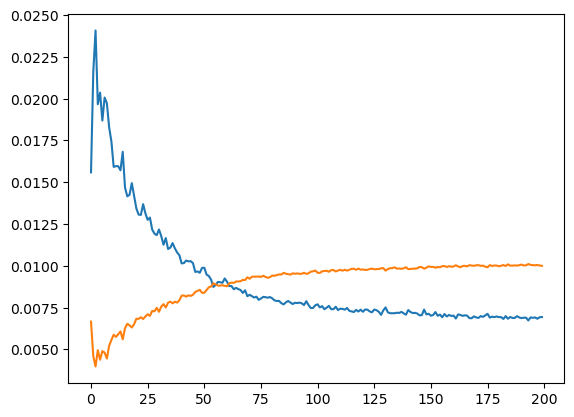

In [26]:
d_loss_=[float(i.cpu().detach().item()) for i in d_loss_]


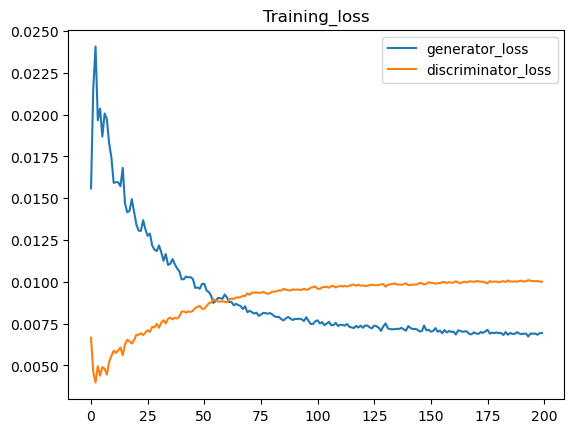

In [28]:

plt.plot(g_loss_,label='generator_loss')
plt.plot(d_loss_,label='discriminator_loss')
plt.title('Training_loss')
plt.legend()
plt.show()

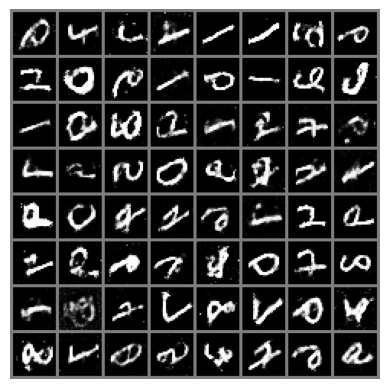

In [39]:
def show(img):
    img = img / 2 + 0.5     # unnormalize the image
    npimg = img.detach().cpu().numpy()
    plt.imshow(np.transpose(npimg, (2,1,0)))
    plt.axis('off')
    plt.show()

# Generate some images using the generator
z = torch.randn(64, 100).to(device)
sample_images = generator(z).view(64, 1, 28, 28)

# Make a grid of the images and display it
grid = torchvision.utils.make_grid(sample_images, nrow=8)
show(grid)
